In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [3]:
# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

In [4]:
# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [16]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [17]:
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.34 | lr:0.0015783939589226594, weight decay:4.635385077805204e-06
val acc:0.64 | lr:0.004721329154127304, weight decay:1.3044837264229482e-07
val acc:0.21 | lr:0.0014323427019155158, weight decay:3.7953905281329135e-06
val acc:0.08 | lr:0.00011072771618877232, weight decay:9.800923533921988e-08
val acc:0.65 | lr:0.0036521343578833068, weight decay:9.619141273027662e-07
val acc:0.08 | lr:0.00026198060023645227, weight decay:4.373163359418619e-08
val acc:0.12 | lr:0.0004918068632943017, weight decay:1.540822266687732e-08
val acc:0.08 | lr:3.760597140185336e-05, weight decay:4.047126185128229e-07
val acc:0.24 | lr:0.0006360542939048602, weight decay:8.432641557884833e-07
val acc:0.57 | lr:0.0031667774281305757, weight decay:4.930586559615625e-06
val acc:0.07 | lr:4.3347798591173084e-06, weight decay:3.565831632682788e-08
val acc:0.14 | lr:2.5201765376653936e-05, weight decay:1.0342506282103859e-06
val acc:0.14 | lr:0.00023576022550768724, weight decay:3.0721476627129066e-06
val 

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.79) | lr:0.009051374217713012, weight decay:4.7729766202703186e-08
Best-2(val acc:0.75) | lr:0.008594843748926023, weight decay:2.5873378224862258e-08
Best-3(val acc:0.73) | lr:0.007788682437645302, weight decay:6.73430185800994e-06
Best-4(val acc:0.72) | lr:0.005207684157605325, weight decay:7.2800359763249e-05
Best-5(val acc:0.71) | lr:0.007505989702787074, weight decay:2.7462509953309147e-08
Best-6(val acc:0.65) | lr:0.0036521343578833068, weight decay:9.619141273027662e-07
Best-7(val acc:0.65) | lr:0.0042672541171910865, weight decay:8.138198953129783e-05
Best-8(val acc:0.64) | lr:0.004721329154127304, weight decay:1.3044837264229482e-07
Best-9(val acc:0.63) | lr:0.004727775422809774, weight decay:9.059626598982116e-08
Best-10(val acc:0.63) | lr:0.004489937699037793, weight decay:6.513222884854864e-07
Best-11(val acc:0.62) | lr:0.004830898759826381, weight decay:7.761137328148458e-05
Best-12(val acc:0.61) 

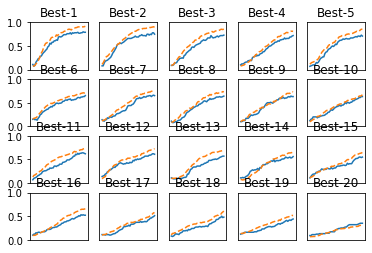

In [18]:
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()